# The Real time Sentiment Analysis model Design by -- Vishwam Solanki

In [224]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

 Import the Data.csv 

In [65]:
df = pd.read_csv("Static-data.csv")
df[:10]

,_id,author,content,description,publishedAt,source.id,source.name,title,url,urlToImage
0,6471ac4e0508754a06eb0477,"Daniel Gilbert, Faiz Siddiqui","Comment on this story\r\nComment\r\nNeuralink,...",Neuralink said it has regulatory approval to c...,2023-05-26T03:59:10Z,the-washington-post,The Washington Post,Elon Musk's Neuralink says it has FDA approval...,https://www.washingtonpost.com/business/2023/0...,https://www.washingtonpost.com/wp-apps/imrs.ph...
1,6471ac4e0508754a06eb0478,"Jay King, Jared Weiss, Joe Vardon",BOSTON From a series sweep to a serious series...,"Derrick White, who opened the conference final...",2023-05-26T03:46:26Z,NaN,The Athletic,Celtics trounce Heat in Game 5 of Eastern Conf...,https://theathletic.com/4554029/2023/05/25/cel...,https://cdn.theathletic.com/app/uploads/2023/0...
2,6471ac4e0508754a06eb0479,NaN,NaN,Jason Robertson had a pair of goals and Joe Pa...,2023-05-26T03:21:08Z,NaN,YouTube,NHL Western Conference Final Game 4 Highlights...,https://www.youtube.com/watch?v=Os7zLvqG4mc,https://i.ytimg.com/vi/Os7zLvqG4mc/maxresdefau...
3,6471ac4e0508754a06eb047a,Al Jazeera,Killer whales severely damaged a sailing boat ...,Dozens of incidents involving groups of orcas ...,2023-05-26T03:07:10Z,al-jazeera-english,Al Jazeera English,Killer whales damage boat in latest orca incid...,https://www.aljazeera.com/news/2023/5/26/kille...,https://www.aljazeera.com/wp-content/uploads/2...
4,6471ac4e0508754a06eb047b,NaN,"WASHINGTON, May 25 (Reuters) - The founder of ...",The founder of the far-right militant Oath Kee...,2023-05-26T03:05:00Z,reuters,Reuters,"Oath Keepers founder gets 18 years in prison, ...",https://www.reuters.com/legal/oath-keepers-fou...,https://www.reuters.com/resizer/gYepgBSexMj5m2...
5,6471ac4e0508754a06eb047c,"James Politi, Lauren Fedor",What is included in my trial?\r\nDuring your t...,"News, analysis and comment from the Financial ...",2023-05-26T02:03:45Z,financial-times,Financial Times,US debt ceiling talks progress as deadline app...,https://www.ft.com/content/3ffeea42-d5ed-45d9-...,NaN
6,6471ac4e0508754a06eb047d,"Alex Ford, María Méndez","Sign up for The Brief, The Texas Tribunes dail...",The Texas Legislature has never removed an att...,2023-05-26T01:49:08Z,NaN,The Texas Tribune,Attorney General Ken Paxton faces impeachment:...,https://www.texastribune.org/2023/05/25/texas-...,https://thumbnails.texastribune.org/qmEBN3yzu7...
7,6471ac4e0508754a06eb047e,LAURAN NEERGAARD AP Medical Writer,WASHINGTON -- About 10% of people appear to su...,A U.S. study suggests 1 in 10 people are getti...,2023-05-26T01:42:30Z,abc-news,ABC News,US study finds 1 in 10 get long COVID after om...,https://abcnews.go.com/Health/wireStory/us-stu...,https://s.abcnews.com/images/Health/wirestory_...
8,6471ac4e0508754a06eb047f,Investor's Business Daily,NaN,NaN,2023-05-26T00:43:00Z,NaN,Investor's Business Daily,"Futures Fall: Nvidia, AI Plays Soar, But This ...",https://www.investors.com/market-trend/stock-m...,NaN
9,6471ac4e0508754a06eb0480,Pete Hammond,"amFAR, the organization founded by the late Dr...","amFAR, the organization founded by the late Dr...",2023-05-26T00:28:00Z,NaN,Deadline,amFAR Cannes Gala: DiCaprio Painting Fetches $...,https://deadline.com/2023/05/amfar-cannes-gala...,https://deadline.com/wp-content/uploads/2023/0...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          180 non-null    object
 1   author       149 non-null    object
 2   content      160 non-null    object
 3   description  171 non-null    object
 4   publishedAt  180 non-null    object
 5   source.id    120 non-null    object
 6   source.name  180 non-null    object
 7   title        180 non-null    object
 8   url          180 non-null    object
 9   urlToImage   170 non-null    object
dtypes: object(10)
memory usage: 14.2+ KB


In [67]:
df.describe

<bound method NDFrame.describe of                           _id                              author  \
0    6471ac4e0508754a06eb0477       Daniel Gilbert, Faiz Siddiqui   
1    6471ac4e0508754a06eb0478   Jay King, Jared Weiss, Joe Vardon   
2    6471ac4e0508754a06eb0479                                 NaN   
3    6471ac4e0508754a06eb047a                          Al Jazeera   
4    6471ac4e0508754a06eb047b                                 NaN   
..                        ...                                 ...   
175  647209b68bafdeb2a83021ee                       Kevin Robbins   
176  647209b68bafdeb2a83021ef                          Al Jazeera   
177  647209b68bafdeb2a83021f0                        Bevan Hurley   
178  647209b68bafdeb2a83021f1  LAURAN NEERGAARD AP Medical Writer   
179  647209b68bafdeb2a83021f2              University of Nebraska   

                                               content  \
0    Comment on this story\r\nComment\r\nNeuralink,...   
1    BOSTON From a se

In [68]:
df.shape

(180, 10)

### data PreProcessing

Removing The Null Value

In [69]:
df.isnull().sum()

_id             0
author         31
content        20
description     9
publishedAt     0
source.id      60
source.name     0
title           0
url             0
urlToImage     10
dtype: int64

In [70]:
df1 = df.pop('urlToImage')

In [71]:
df1

0      https://www.washingtonpost.com/wp-apps/imrs.ph...
1      https://cdn.theathletic.com/app/uploads/2023/0...
2      https://i.ytimg.com/vi/Os7zLvqG4mc/maxresdefau...
3      https://www.aljazeera.com/wp-content/uploads/2...
4      https://www.reuters.com/resizer/gYepgBSexMj5m2...
                             ...                        
175    https://res.cloudinary.com/pgatour-prod/w_1200...
176    https://www.aljazeera.com/wp-content/uploads/2...
177    https://static.independent.co.uk/2023/05/24/21...
178    https://s.abcnews.com/images/Health/wirestory_...
179    https://dohz8k90z3boq.cloudfront.net/images/20...
Name: urlToImage, Length: 180, dtype: object

In [72]:
df.shape
df.head(5)

,_id,author,content,description,publishedAt,source.id,source.name,title,url
0,6471ac4e0508754a06eb0477,"Daniel Gilbert, Faiz Siddiqui","Comment on this story\r\nComment\r\nNeuralink,...",Neuralink said it has regulatory approval to c...,2023-05-26T03:59:10Z,the-washington-post,The Washington Post,Elon Musk's Neuralink says it has FDA approval...,https://www.washingtonpost.com/business/2023/0...
1,6471ac4e0508754a06eb0478,"Jay King, Jared Weiss, Joe Vardon",BOSTON From a series sweep to a serious series...,"Derrick White, who opened the conference final...",2023-05-26T03:46:26Z,NaN,The Athletic,Celtics trounce Heat in Game 5 of Eastern Conf...,https://theathletic.com/4554029/2023/05/25/cel...
2,6471ac4e0508754a06eb0479,NaN,NaN,Jason Robertson had a pair of goals and Joe Pa...,2023-05-26T03:21:08Z,NaN,YouTube,NHL Western Conference Final Game 4 Highlights...,https://www.youtube.com/watch?v=Os7zLvqG4mc
3,6471ac4e0508754a06eb047a,Al Jazeera,Killer whales severely damaged a sailing boat ...,Dozens of incidents involving groups of orcas ...,2023-05-26T03:07:10Z,al-jazeera-english,Al Jazeera English,Killer whales damage boat in latest orca incid...,https://www.aljazeera.com/news/2023/5/26/kille...
4,6471ac4e0508754a06eb047b,NaN,"WASHINGTON, May 25 (Reuters) - The founder of ...",The founder of the far-right militant Oath Kee...,2023-05-26T03:05:00Z,reuters,Reuters,"Oath Keepers founder gets 18 years in prison, ...",https://www.reuters.com/legal/oath-keepers-fou...


In [73]:
df['_id']

0      6471ac4e0508754a06eb0477
1      6471ac4e0508754a06eb0478
2      6471ac4e0508754a06eb0479
3      6471ac4e0508754a06eb047a
4      6471ac4e0508754a06eb047b
                 ...           
175    647209b68bafdeb2a83021ee
176    647209b68bafdeb2a83021ef
177    647209b68bafdeb2a83021f0
178    647209b68bafdeb2a83021f1
179    647209b68bafdeb2a83021f2
Name: _id, Length: 180, dtype: object

In [74]:
df.isnull().sum()

_id             0
author         31
content        20
description     9
publishedAt     0
source.id      60
source.name     0
title           0
url             0
dtype: int64

In [75]:
df.pop('source.id')

0      the-washington-post
1                      NaN
2                      NaN
3       al-jazeera-english
4                  reuters
              ...         
175                    NaN
176     al-jazeera-english
177            independent
178               abc-news
179                    NaN
Name: source.id, Length: 180, dtype: object

In [76]:
df.head(5)

,_id,author,content,description,publishedAt,source.name,title,url
0,6471ac4e0508754a06eb0477,"Daniel Gilbert, Faiz Siddiqui","Comment on this story\r\nComment\r\nNeuralink,...",Neuralink said it has regulatory approval to c...,2023-05-26T03:59:10Z,The Washington Post,Elon Musk's Neuralink says it has FDA approval...,https://www.washingtonpost.com/business/2023/0...
1,6471ac4e0508754a06eb0478,"Jay King, Jared Weiss, Joe Vardon",BOSTON From a series sweep to a serious series...,"Derrick White, who opened the conference final...",2023-05-26T03:46:26Z,The Athletic,Celtics trounce Heat in Game 5 of Eastern Conf...,https://theathletic.com/4554029/2023/05/25/cel...
2,6471ac4e0508754a06eb0479,NaN,NaN,Jason Robertson had a pair of goals and Joe Pa...,2023-05-26T03:21:08Z,YouTube,NHL Western Conference Final Game 4 Highlights...,https://www.youtube.com/watch?v=Os7zLvqG4mc
3,6471ac4e0508754a06eb047a,Al Jazeera,Killer whales severely damaged a sailing boat ...,Dozens of incidents involving groups of orcas ...,2023-05-26T03:07:10Z,Al Jazeera English,Killer whales damage boat in latest orca incid...,https://www.aljazeera.com/news/2023/5/26/kille...
4,6471ac4e0508754a06eb047b,NaN,"WASHINGTON, May 25 (Reuters) - The founder of ...",The founder of the far-right militant Oath Kee...,2023-05-26T03:05:00Z,Reuters,"Oath Keepers founder gets 18 years in prison, ...",https://www.reuters.com/legal/oath-keepers-fou...


In [77]:
df1 = df.dropna(axis=0,inplace=False)

In [78]:
df1.head()

,_id,author,content,description,publishedAt,source.name,title,url
0,6471ac4e0508754a06eb0477,"Daniel Gilbert, Faiz Siddiqui","Comment on this story\r\nComment\r\nNeuralink,...",Neuralink said it has regulatory approval to c...,2023-05-26T03:59:10Z,The Washington Post,Elon Musk's Neuralink says it has FDA approval...,https://www.washingtonpost.com/business/2023/0...
1,6471ac4e0508754a06eb0478,"Jay King, Jared Weiss, Joe Vardon",BOSTON From a series sweep to a serious series...,"Derrick White, who opened the conference final...",2023-05-26T03:46:26Z,The Athletic,Celtics trounce Heat in Game 5 of Eastern Conf...,https://theathletic.com/4554029/2023/05/25/cel...
3,6471ac4e0508754a06eb047a,Al Jazeera,Killer whales severely damaged a sailing boat ...,Dozens of incidents involving groups of orcas ...,2023-05-26T03:07:10Z,Al Jazeera English,Killer whales damage boat in latest orca incid...,https://www.aljazeera.com/news/2023/5/26/kille...
5,6471ac4e0508754a06eb047c,"James Politi, Lauren Fedor",What is included in my trial?\r\nDuring your t...,"News, analysis and comment from the Financial ...",2023-05-26T02:03:45Z,Financial Times,US debt ceiling talks progress as deadline app...,https://www.ft.com/content/3ffeea42-d5ed-45d9-...
6,6471ac4e0508754a06eb047d,"Alex Ford, María Méndez","Sign up for The Brief, The Texas Tribunes dail...",The Texas Legislature has never removed an att...,2023-05-26T01:49:08Z,The Texas Tribune,Attorney General Ken Paxton faces impeachment:...,https://www.texastribune.org/2023/05/25/texas-...


In [79]:
df1.isnull().sum() #NO null value is remaining

_id            0
author         0
content        0
description    0
publishedAt    0
source.name    0
title          0
url            0
dtype: int64

In [80]:
df1['_id']

0      6471ac4e0508754a06eb0477
1      6471ac4e0508754a06eb0478
3      6471ac4e0508754a06eb047a
5      6471ac4e0508754a06eb047c
6      6471ac4e0508754a06eb047d
                 ...           
175    647209b68bafdeb2a83021ee
176    647209b68bafdeb2a83021ef
177    647209b68bafdeb2a83021f0
178    647209b68bafdeb2a83021f1
179    647209b68bafdeb2a83021f2
Name: _id, Length: 132, dtype: object

In [81]:
df1['content'] = df1['content'].str.replace('\r|\n',"")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10488\3909394999.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['content'] = df1['content'].str.replace('\r|\n',"")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10488\3909394999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content'] = df1['content'].str.replace('\r|\n',"")


In [82]:
df1[:10]

,_id,author,content,description,publishedAt,source.name,title,url
0,6471ac4e0508754a06eb0477,"Daniel Gilbert, Faiz Siddiqui","Comment on this storyCommentNeuralink, Elon Mu...",Neuralink said it has regulatory approval to c...,2023-05-26T03:59:10Z,The Washington Post,Elon Musk's Neuralink says it has FDA approval...,https://www.washingtonpost.com/business/2023/0...
1,6471ac4e0508754a06eb0478,"Jay King, Jared Weiss, Joe Vardon",BOSTON From a series sweep to a serious series...,"Derrick White, who opened the conference final...",2023-05-26T03:46:26Z,The Athletic,Celtics trounce Heat in Game 5 of Eastern Conf...,https://theathletic.com/4554029/2023/05/25/cel...
3,6471ac4e0508754a06eb047a,Al Jazeera,Killer whales severely damaged a sailing boat ...,Dozens of incidents involving groups of orcas ...,2023-05-26T03:07:10Z,Al Jazeera English,Killer whales damage boat in latest orca incid...,https://www.aljazeera.com/news/2023/5/26/kille...
5,6471ac4e0508754a06eb047c,"James Politi, Lauren Fedor",What is included in my trial?During your trial...,"News, analysis and comment from the Financial ...",2023-05-26T02:03:45Z,Financial Times,US debt ceiling talks progress as deadline app...,https://www.ft.com/content/3ffeea42-d5ed-45d9-...
6,6471ac4e0508754a06eb047d,"Alex Ford, María Méndez","Sign up for The Brief, The Texas Tribunes dail...",The Texas Legislature has never removed an att...,2023-05-26T01:49:08Z,The Texas Tribune,Attorney General Ken Paxton faces impeachment:...,https://www.texastribune.org/2023/05/25/texas-...
7,6471ac4e0508754a06eb047e,LAURAN NEERGAARD AP Medical Writer,WASHINGTON -- About 10% of people appear to su...,A U.S. study suggests 1 in 10 people are getti...,2023-05-26T01:42:30Z,ABC News,US study finds 1 in 10 get long COVID after om...,https://abcnews.go.com/Health/wireStory/us-stu...
9,6471ac4e0508754a06eb0480,Pete Hammond,"amFAR, the organization founded by the late Dr...","amFAR, the organization founded by the late Dr...",2023-05-26T00:28:00Z,Deadline,amFAR Cannes Gala: DiCaprio Painting Fetches $...,https://deadline.com/2023/05/amfar-cannes-gala...
11,6471ac4e0508754a06eb0482,"Timothy Puko, Robert Barnes",Comment on this storyCommentBogs. Marshes. Swa...,The decision could affect tens of thousands of...,2023-05-25T23:57:00Z,The Washington Post,How Supreme Court's EPA ruling will affect U.S...,https://www.washingtonpost.com/climate-environ...
16,6471ac4e0508754a06eb0487,Brad Dress,Skip to contentWagner Group founder Yevgeny Pr...,Wagner Group founder Yevgeny Prigozhin once ag...,2023-05-25T22:37:00Z,The Hill,Why the Wagner boss is saying Russia could los...,https://thehill.com/policy/defense/4021563-why...
17,6471ac4e0508754a06eb0488,Brooke Kato,Forego forgetfulness with one daily habit.Memo...,Forego forgetfulness with one daily habit.,2023-05-25T21:56:00Z,New York Post,Multivitamins could curb age-related memory lo...,https://nypost.com/2023/05/25/multivitamins-co...


## Apply the Senitment Analysis to the given data

In [83]:
# Creating the model
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression #import Logistic Regression 
from sklearn.naive_bayes import MultinomialNB #import Naive Byes
from sklearn.svm import SVC #import the SVM
import nltk


In [84]:
nltk.download('')


nltk.download('vander_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Error loading : Package '' not found in index
[nltk_data] Error loading vander_lexicon: Package 'vander_lexicon' not
[nltk_data]     found in index


In [85]:
senti = SentimentIntensityAnalyzer()
def get_senttiment(text):
    text = str(text)
    senti_score = senti.polarity_scores(text)
    compound_score = senti_score['compound']
    
    if compound_score > 0:
        return 'Positive'
    elif compound_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

### Creating the Sentiment column

In [90]:
df1['sentiments'] = df1['description'].apply(get_senttiment)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10488\2767381896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiments'] = df1['description'].apply(get_senttiment)


In [91]:
df1.head(10)

,_id,author,content,description,publishedAt,source.name,title,url,sentiments
0,6471ac4e0508754a06eb0477,"Daniel Gilbert, Faiz Siddiqui","Comment on this storyCommentNeuralink, Elon Mu...",Neuralink said it has regulatory approval to c...,2023-05-26T03:59:10Z,The Washington Post,Elon Musk's Neuralink says it has FDA approval...,https://www.washingtonpost.com/business/2023/0...,Positive
1,6471ac4e0508754a06eb0478,"Jay King, Jared Weiss, Joe Vardon",BOSTON From a series sweep to a serious series...,"Derrick White, who opened the conference final...",2023-05-26T03:46:26Z,The Athletic,Celtics trounce Heat in Game 5 of Eastern Conf...,https://theathletic.com/4554029/2023/05/25/cel...,Negative
3,6471ac4e0508754a06eb047a,Al Jazeera,Killer whales severely damaged a sailing boat ...,Dozens of incidents involving groups of orcas ...,2023-05-26T03:07:10Z,Al Jazeera English,Killer whales damage boat in latest orca incid...,https://www.aljazeera.com/news/2023/5/26/kille...,Neutral
5,6471ac4e0508754a06eb047c,"James Politi, Lauren Fedor",What is included in my trial?During your trial...,"News, analysis and comment from the Financial ...",2023-05-26T02:03:45Z,Financial Times,US debt ceiling talks progress as deadline app...,https://www.ft.com/content/3ffeea42-d5ed-45d9-...,Neutral
6,6471ac4e0508754a06eb047d,"Alex Ford, María Méndez","Sign up for The Brief, The Texas Tribunes dail...",The Texas Legislature has never removed an att...,2023-05-26T01:49:08Z,The Texas Tribune,Attorney General Ken Paxton faces impeachment:...,https://www.texastribune.org/2023/05/25/texas-...,Neutral
7,6471ac4e0508754a06eb047e,LAURAN NEERGAARD AP Medical Writer,WASHINGTON -- About 10% of people appear to su...,A U.S. study suggests 1 in 10 people are getti...,2023-05-26T01:42:30Z,ABC News,US study finds 1 in 10 get long COVID after om...,https://abcnews.go.com/Health/wireStory/us-stu...,Negative
9,6471ac4e0508754a06eb0480,Pete Hammond,"amFAR, the organization founded by the late Dr...","amFAR, the organization founded by the late Dr...",2023-05-26T00:28:00Z,Deadline,amFAR Cannes Gala: DiCaprio Painting Fetches $...,https://deadline.com/2023/05/amfar-cannes-gala...,Positive
11,6471ac4e0508754a06eb0482,"Timothy Puko, Robert Barnes",Comment on this storyCommentBogs. Marshes. Swa...,The decision could affect tens of thousands of...,2023-05-25T23:57:00Z,The Washington Post,How Supreme Court's EPA ruling will affect U.S...,https://www.washingtonpost.com/climate-environ...,Neutral
16,6471ac4e0508754a06eb0487,Brad Dress,Skip to contentWagner Group founder Yevgeny Pr...,Wagner Group founder Yevgeny Prigozhin once ag...,2023-05-25T22:37:00Z,The Hill,Why the Wagner boss is saying Russia could los...,https://thehill.com/policy/defense/4021563-why...,Negative
17,6471ac4e0508754a06eb0488,Brooke Kato,Forego forgetfulness with one daily habit.Memo...,Forego forgetfulness with one daily habit.,2023-05-25T21:56:00Z,New York Post,Multivitamins could curb age-related memory lo...,https://nypost.com/2023/05/25/multivitamins-co...,Neutral


In [215]:
df1.isnull().sum()
print(df1.shape)

(132, 9)


## Model training and Testing

In [193]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train,X_test,Y_train,Y_test = train_test_split(df1['description'],df1['sentiments'],test_size=0.2,random_state =42 )


In [177]:
'''
For Knowledeg for me -------------->
What is TF-IDF used for?
TF-IDF stands for term frequency-inverse document frequency and it is a measure,
used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or
relevance of string representations (words, phrases, lemmas, etc) in a document

TF-IDF will transform the text into meaningful representation of integers or 
numbers which is used to fit machine learning algorithm for predictions
'''


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
# print(X_train_vectors)
# print(X_test_vectors)


In [195]:
x_train_resample,y_train_resample = smote.fit_resample(X_train_vectors,Y_train)

### Applying and Train the Model(LogiticRegression)

In [196]:
X_train_dense = X_train_vectors.toarray()
X_test_dense = X_test_vectors.toarray()
model = LogisticRegression()
# model.fit(X_train_dense,Y_train)
model.fit(x_train_resample,y_train_resample)


LogisticRegression()

In [197]:
y_pred = model.predict(X_test_vectors)

In [198]:
y_pred

array(['Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Neutral', 'Positive', 'Neutral', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Neutral', 'Negative', 'Neutral',
       'Negative', 'Positive'], dtype=object)

In [199]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(Y_test,y_pred)

In [200]:
print("accuracy = ",accuracy)
print("accuracy(per%) = "+str(round(accuracy*100,2))+"%")

accuracy =  0.37037037037037035
accuracy(per%) = 37.04%


### Applying the model Traninig (Support Vector Machine)

In [233]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train_resample,y_train_resample)

SVC()

In [234]:
y_train_resample

0      Negative
1       Neutral
2      Positive
3      Positive
4       Neutral
         ...   
163    Positive
164    Positive
165    Positive
166    Positive
167    Positive
Name: sentiments, Length: 168, dtype: object

#### Hyper parameter Tunnig

In [236]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(svm_model,param_grid,cv=5)
grid_search.fit(x_train_resample,y_train_resample)

best_params = grid_search.best_params_
svm_model_best = svm.SVC(**best_params)
svm_model_best.fit(x_train_resample,y_train_resample)

svm_y_best_pred = svm_model_best.predict(X_test_vectors)


svm_best_accuracy = accuracy_score(Y_test,svm_y_best_pred)

print("SVM accuracy = ",svm_best_accuracy)

print("SVM_accuracy(per%) = "+str(round(svm_best_accuracy*100,2))+"%")


SVM accuracy =  0.37037037037037035
SVM_accuracy(per%) = 37.04%


### Confusion Matrix

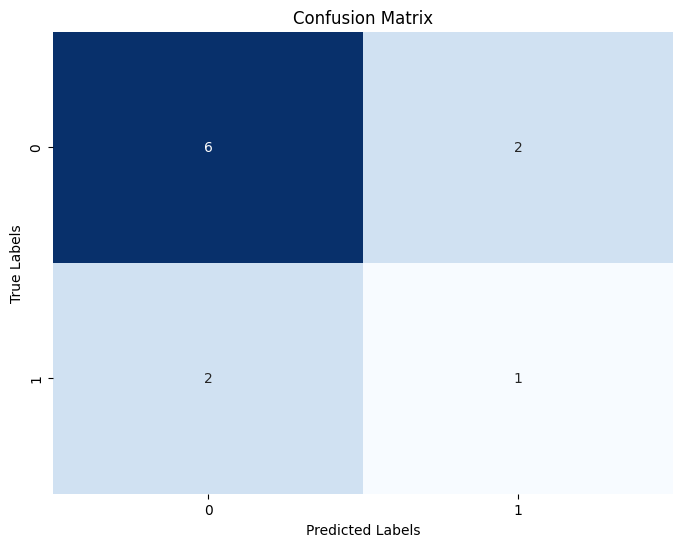

In [230]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
cm = confusion_matrix(Y_test,y_pred)
tn = cm[0, 0]  
fp = cm[0, 1] 
fn = cm[1, 0]  
tp = cm[1, 1] 

confusion_mat = [[tn, fp], [fn, tp]]

plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Test this

In [231]:
New_news = ['Indian scientists develop capsules to curb crop burning']
new_vectors = vectorizer.transform(New_news)
prediction = model.predict(new_vectors)
print("So Sentiment of Test case => ",prediction[0])
df1['sentiments'].value_counts()

So Sentiment of Test case =>  Negative


Negative    68
Positive    35
Neutral     29
Name: sentiments, dtype: int64